In [5]:
import os

def count_files_in_directory(directory):
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

base_dir_path = 'data/acdc/gt'

for weather_dir in os.listdir(base_dir_path):
    weather_count = 0
    split_dir = os.path.join(base_dir_path, weather_dir, 'train')
    for subdir in os.listdir(split_dir):
        subdir_path = os.path.join(split_dir, subdir)
        if os.path.isdir(subdir_path):
            file_count = count_files_in_directory(subdir_path)
            weather_count += file_count
    print(f"{weather_dir}: {weather_count} files")

            

night: 2000 files
snow: 2000 files
rain: 2000 files
fog: 2000 files


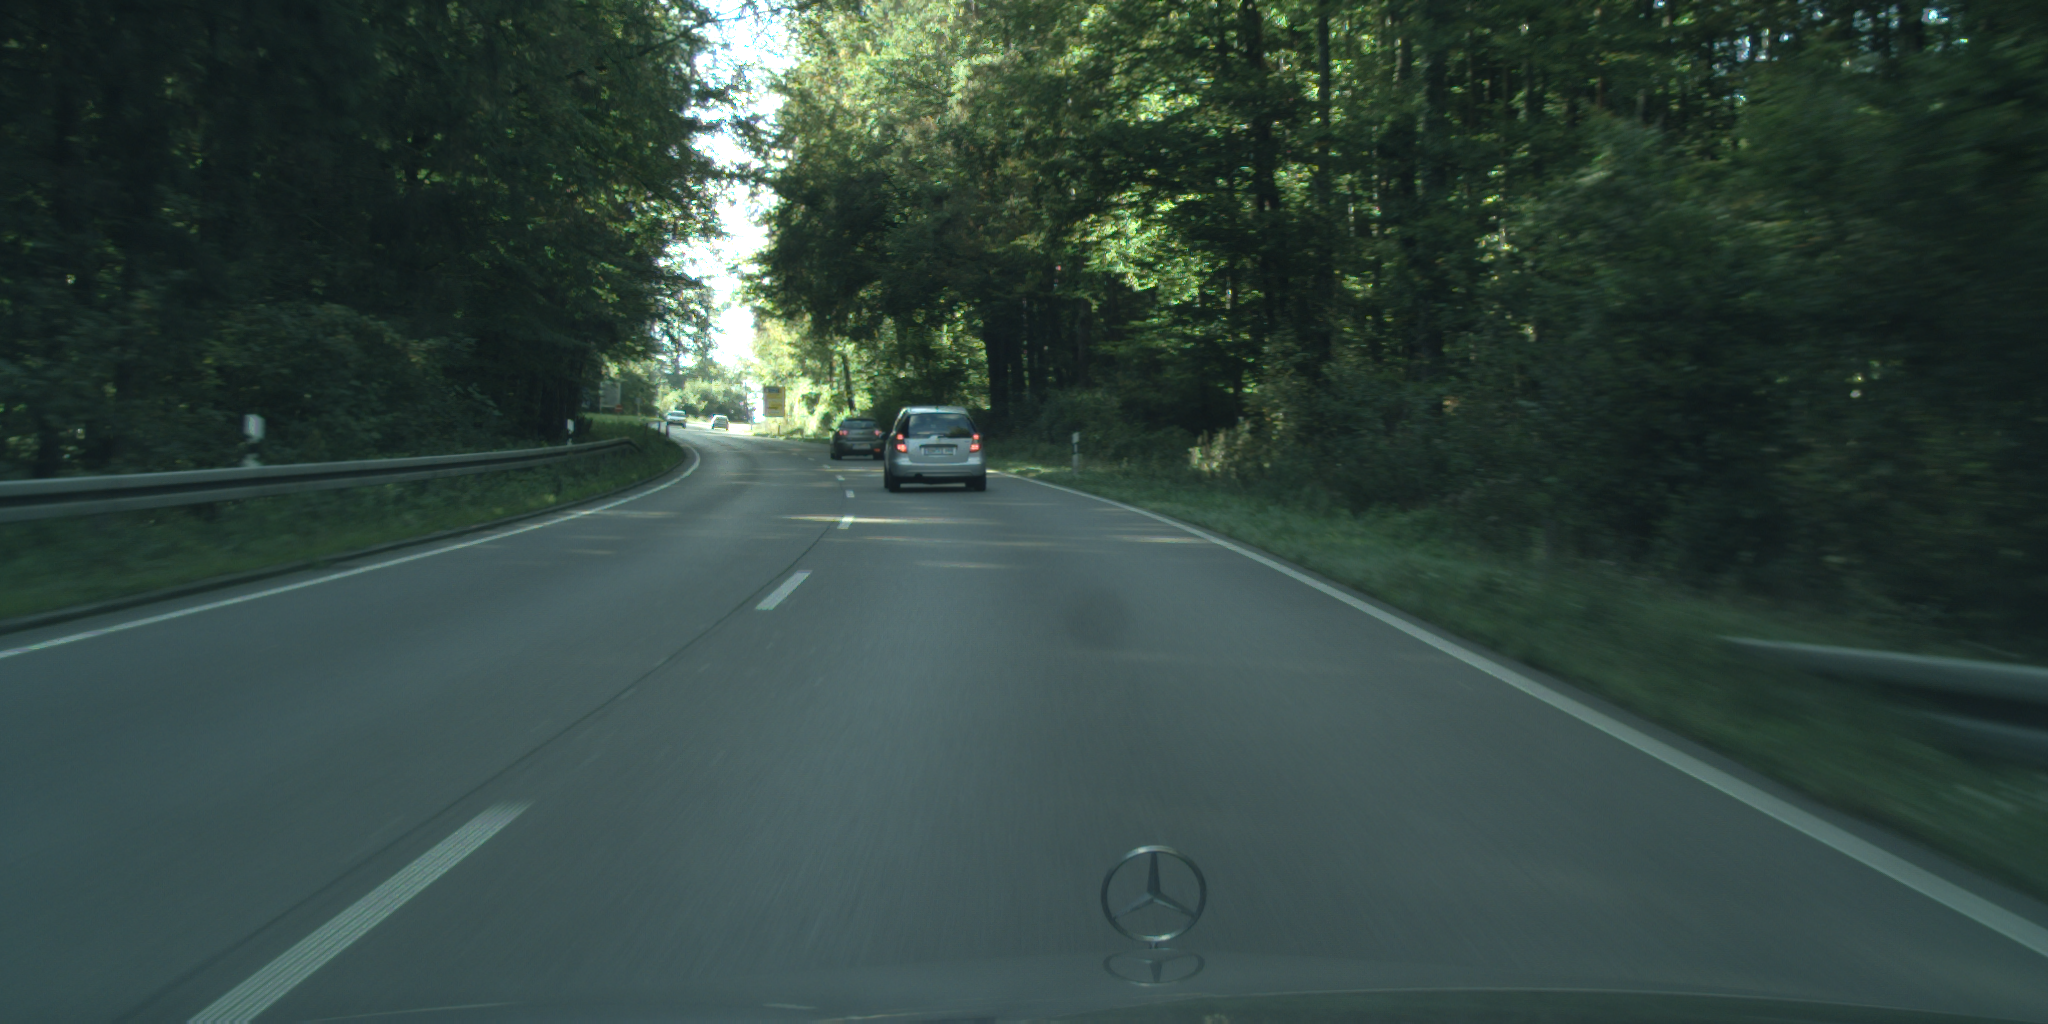

In [1]:
from pathlib import Path
from PIL import Image
from torchvision.transforms import functional as TF, transforms
import numpy as np

image_path = '/home/talmacsi/BME/weather_translation_clean/data/cityscapes/leftImg8bit/my_test/lindau/lindau_000058_000019_leftImg8bit.png'

img = Image.open(image_path).convert("RGB")

img.show()

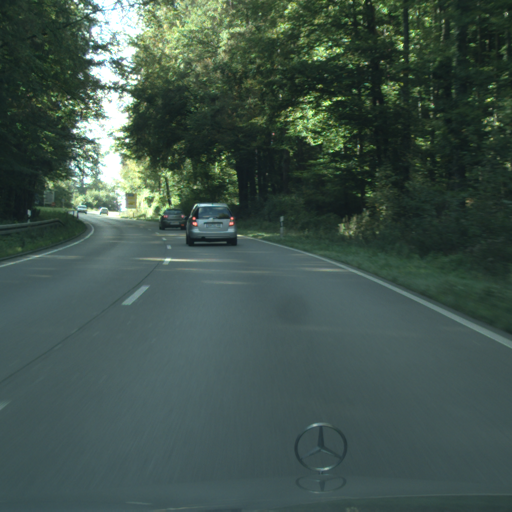

(512, 512)


In [19]:
size = 512

img_res = TF.resize(img, (size, size * 2), interpolation=transforms.InterpolationMode.BICUBIC, antialias=True)
image = TF.center_crop(img_res, size)

image.show()
print(image.size)

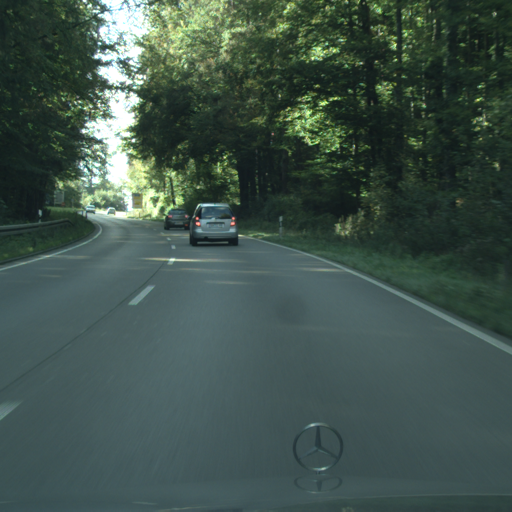

(512, 512)


In [17]:
i, j, h, w = transforms.RandomResizedCrop.get_params(img, scale=(0.8, 1.0), ratio=(0.95, 1.05))
image = TF.resized_crop(
    img,
    top=i,
    left=j,
    height=h,
    width=w,
    size=(size, size),
    interpolation=transforms.InterpolationMode.BICUBIC,
    antialias=True,
)

image.show()
print(image.size)

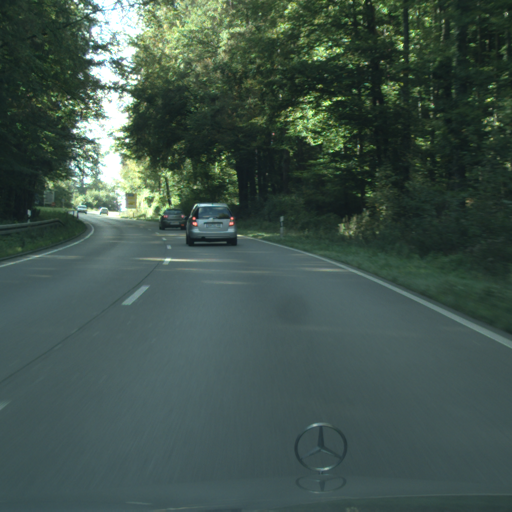

(512, 512)


In [18]:
transform = transforms.Compose([
    transforms.Resize(
        (size, size * 2),  # e.g., 512x1024 from 1024x2048
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=True,
    ),
    transforms.CenterCrop(size),  # take the centre square region
])

image = transform(img)
image.show()
print(image.size)